In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf

In [121]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, LSTM, Conv1D, MaxPooling1D, SpatialDropout1D, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [3]:
from text_cleaning import text_cleaning

# Cleaning of training data

In [4]:
train_data = pd.read_csv('train.csv')
train_data

tweets       class
0      Be aware  dirty step to get money  #staylight ...  figurative
1      #sarcasm for #people who don't understand #diy...  figurative
2      @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3      @wilw Why do I get the feeling you like games?...  figurative
4      -@TeacherArthurG @rweingarten You probably jus...  figurative
...                                                  ...         ...
81403  Photo: Image via We Heart It http://t.co/ky8Nf...     sarcasm
81404  I never knew..I better put this out to the Uni...     sarcasm
81405  hey just wanted to say thanks @ puberty for le...     sarcasm
81406  I'm sure coverage like the Fox News Special ‚ÄúT...     sarcasm
81407  @skeyno16 at u13?! I won't believe it until I ...     sarcasm

[81408 rows x 2 columns]

In [16]:
train_data.columns = ['tweets', 'fos_class']       # the name 'class' is changed because it is already defined in python
train_data = train_data.sample(frac=1, random_state=123).reset_index(drop=True)   # shuffling the dataset
train_data

tweets   fos_class
0      #socialtimes #news Foodworthy Image-Based Food...     regular
1      Watching Trainwreck then realizing my life is ...       irony
2      After the 9/16 #GOPDebate @ronaldreagan40 look...     regular
3      true üòúif you don't speak fluent sarcasm there'...  figurative
4      How to host Wordpress http://t.co/ZYOw8hfYO6 #...     regular
...                                                  ...         ...
81403  That's surely enough to stop #ISIS\n#sarcasm  ...  figurative
81404  Just been lectured on need to find non-polluti...       irony
81405  #chocolate at 1 a.m. :D #living #late #lol htt...     regular
81406  Reservation project has lost the requirement t...  figurative
81407  THIS RIGHT HERE!!!!!! Too many decisions being...  figurative

[81408 rows x 2 columns]

In [17]:
# checking nan values
train_data.isna().sum()

tweets       0
fos_class    0
dtype: int64

In [18]:
# data points for each figure of speech
train_data.fos_class.value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: fos_class, dtype: int64

In [19]:
'''
clean_train_data = train_data.copy()

for i in tqdm(range(len(train_data))):
    clean_train_data.tweets[i] = str(text_cleaning(train_data.tweets[i]))
    
clean_train_data.to_csv('clean_train_data.csv', index=False)
    '''

clean_train_data = pd.read_csv('clean_train_data.csv')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 81408/81408 [06:01<00:00, 225.07it/s]


In [22]:
clean_train_data

tweets   fos_class
0      socialtimes news foodworthy imagebased food ra...     regular
1      watching trainwreck realizing life train wreck...       irony
2                      916 gopdebate look snap poll tell     regular
3      true dont speak fluent sarcasm theres good cha...  figurative
4      host wordpress wordpress education design tech...     regular
...                                                  ...         ...
81403              thats surely enough stop isis sarcasm  figurative
81404  lectured need find nonpolluting ways travel pu...       irony
81405                        chocolate 1 living late lol     regular
81406  reservation project lost requirement finalized...  figurative
81407  right many decisions made people wait conferen...  figurative

[81408 rows x 2 columns]

# Tokenization of tweets

In [23]:
vocab_size = 10000
max_length = 35
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [24]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(clean_train_data.tweets.to_list())

In [25]:
tokenizer.word_index.items()

dict_items([('<OOV>', 1), ('sarcasm', 2), ('irony', 3), ('ironic', 4), ('news', 5), ('im', 6), ('love', 7), ('like', 8), ('people', 9), ('peace', 10), ('late', 11), ('humor', 12), ('education', 13), ('get', 14), ('politics', 15), ('drugs', 16), ('dont', 17), ('one', 18), ('funny', 19), ('day', 20), ('good', 21), ('lol', 22), ('know', 23), ('time', 24), ('great', 25), ('sarcastic', 26), ('cant', 27), ('gopdebate', 28), ('see', 29), ('really', 30), ('us', 31), ('new', 32), ('today', 33), ('would', 34), ('oh', 35), ('life', 36), ('right', 37), ('work', 38), ('well', 39), ('think', 40), ('go', 41), ('never', 42), ('way', 43), ('got', 44), ('make', 45), ('thats', 46), ('want', 47), ('need', 48), ('much', 49), ('back', 50), ('going', 51), ('2', 52), ('via', 53), ('thanks', 54), ('say', 55), ('night', 56), ('man', 57), ('better', 58), ('first', 59), ('best', 60), ('youre', 61), ('last', 62), ('fun', 63), ('u', 64), ('someone', 65), ('sure', 66), ('world', 67), ('didnt', 68), ('even', 69), ('s

In [26]:
len(tokenizer.word_index.items())

72189

In [27]:
train_sequences = tokenizer.texts_to_sequences(clean_train_data.tweets.to_list())
train_sequences[345]

[111, 1, 3619, 5052, 29, 1357, 3008, 2428, 1357, 123, 36, 4]

In [28]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
train_padded[345]

array([ 111,    1, 3619, 5052,   29, 1357, 3008, 2428, 1357,  123,   36,
          4,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

# Tokenization of labels

In [112]:
label_maping = {'figurative':0,
                 'sarcasm':1,
                 'irony':2,
                 'regular':3}
y_train = list()
for i in range(len(clean_train_data)):
    y_train.append(np.eye(4)[label_maping[clean_train_data.fos_class[i]]])

y_train = np.array(y_train, dtype=int)
y_train

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

# Mapping tweets with glove word embeddings

In [30]:
embeddings = {}
glove = open('glove.6B.200d.txt', 'r', encoding = 'utf-8').read()

In [31]:
for line in tqdm(glove.split("\n")):
    values = line.split(" ")
    word = values[0]
    indices = np.asarray(values[1: ], dtype='float32')
    embeddings[word] = indices

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 400001/400001 [00:20<00:00, 19119.44it/s]


In [32]:
embedding_dim = 200
emb_matrix = np.zeros((vocab_size+1, embedding_dim)) 
for word, i in tokenizer.word_index.items():
    if i<vocab_size+1:
        embedding_vec = embeddings.get(word) 
        if embedding_vec is not None: 
            emb_matrix[i] = embedding_vec 
        
emb_matrix.shape

(10001, 200)

In [33]:
emb_matrix[2]

array([ 0.62538999,  0.46568999,  0.60732001, -0.47839999, -0.32909   ,
        0.48936   , -0.37059   ,  0.34226   , -0.10937   ,  0.68344998,
       -0.19043   ,  0.65208   , -0.30407   ,  0.10339   , -0.069518  ,
        0.15511   ,  0.25751001, -0.097239  ,  0.49634001, -0.13178   ,
        0.1505    , -0.44466001,  0.16622999,  0.0043739 , -0.20187999,
       -0.64469999, -1.23979998,  0.042317  , -0.12778001, -0.52511001,
       -1.02160001,  0.060753  ,  0.25141999,  0.70152003,  0.073605  ,
       -0.75171   ,  0.26137   , -0.40204   , -0.088056  ,  0.18095   ,
        0.46641999,  0.050578  ,  0.036427  , -0.13031   , -0.088021  ,
       -0.43279999,  0.080362  ,  0.54430002,  0.79525   ,  0.25384   ,
       -0.17290001, -0.30636999,  0.015178  ,  0.69357002,  0.41382   ,
        0.34064001, -0.15185   ,  0.57411999, -0.62405998, -0.35705999,
        0.37202999,  0.072245  ,  0.22316   ,  0.53113002,  0.32233   ,
        0.97631001, -0.018428  , -0.38812   ,  0.63393003, -0.09

# Model training

In [69]:
print(train_padded.shape,y_train.shape)

(81408, 35) (81408, 4)


In [128]:
model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights= [emb_matrix], trainable=False),
    LSTM(128, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(4, activation='sigmoid')
    ])


optimizer = Adam(learning_rate=0.00001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 35, 200)           2000200   
_________________________________________________________________
lstm_28 (LSTM)               (None, 128)               168448    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 260       
Total params: 2,177,164
Trainable params: 176,964
Non-trainable params: 2,000,200
_____________________________________

In [129]:
history = model.fit(train_padded, y_train, validation_split=0.2, epochs = 20, batch_size=32)

Train on 65126 samples, validate on 16282 samples
Epoch 1/20
65126/65126 [==============================] - 16s 252us/sample - loss: 0.5525 - accuracy: 0.7582 - val_loss: 0.4194 - val_accuracy: 0.8019
Epoch 2/20
65126/65126 [==============================] - 16s 240us/sample - loss: 0.3755 - accuracy: 0.8147 - val_loss: 0.3057 - val_accuracy: 0.8542
Epoch 3/20
65126/65126 [==============================] - 15s 235us/sample - loss: 0.2995 - accuracy: 0.8499 - val_loss: 0.2733 - val_accuracy: 0.8642
Epoch 4/20
65126/65126 [==============================] - 16s 240us/sample - loss: 0.2801 - accuracy: 0.8562 - val_loss: 0.2632 - val_accuracy: 0.8665
Epoch 5/20
65126/65126 [==============================] - 16s 248us/sample - loss: 0.2722 - accuracy: 0.8586 - val_loss: 0.2591 - val_accuracy: 0.8677
Epoch 6/20
65126/65126 [==============================] - 16s 249us/sample - loss: 0.2681 - accuracy: 0.8600 - val_loss: 0.2569 - val_accuracy: 0.8682
Epoch 7/20
65126/65126 [====================

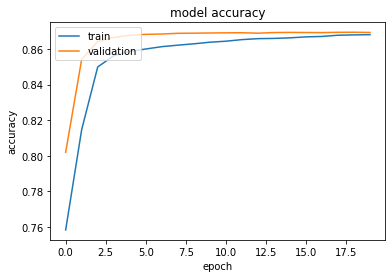

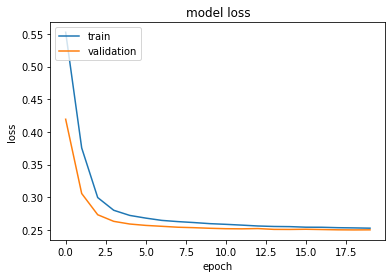

In [130]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Cleaning of test data

In [38]:
test_data = pd.read_csv('test.csv')
test_data

tweets       class
0     no one ever predicted this was going to happen...  figurative
1     @Stooshie its as closely related as Andrews or...  figurative
2     I find it ironic when Vegans say they love foo...  figurative
3     Quick rt that throwing money vine I've not see...  figurative
4     yep, keep adding me to your #devops lists.... ...  figurative
...                                                 ...         ...
8123  Why yes I will totally submit my photos to a s...     sarcasm
8124  Test on a Saturday! Thank you uni! #sarcasm @ ...     sarcasm
8125  Listening to @StephenKing's Misery isn't at al...     sarcasm
8126  @mmcpatt There you go being kind again #sarcas...     sarcasm
8127  I'm shocked that these refs in the tcu vs minn...     sarcasm

[8128 rows x 2 columns]

In [39]:
test_data.columns = ['tweets', 'fos_class']       # the name 'class' is changed because it is already defined in python
# test_data = test_data.sample(frac=1, random_state=123).reset_index(drop=True)   # no need of shuffling
test_data

tweets   fos_class
0     no one ever predicted this was going to happen...  figurative
1     @Stooshie its as closely related as Andrews or...  figurative
2     I find it ironic when Vegans say they love foo...  figurative
3     Quick rt that throwing money vine I've not see...  figurative
4     yep, keep adding me to your #devops lists.... ...  figurative
...                                                 ...         ...
8123  Why yes I will totally submit my photos to a s...     sarcasm
8124  Test on a Saturday! Thank you uni! #sarcasm @ ...     sarcasm
8125  Listening to @StephenKing's Misery isn't at al...     sarcasm
8126  @mmcpatt There you go being kind again #sarcas...     sarcasm
8127  I'm shocked that these refs in the tcu vs minn...     sarcasm

[8128 rows x 2 columns]

In [40]:
# checking nan values
test_data.isna().sum()

tweets       2
fos_class    9
dtype: int64

In [41]:
# replacing nan values with 0
test_data.tweets = test_data.tweets.replace(np.nan, 0)
test_data.fos_class = test_data.fos_class.replace(np.nan, 'regular')

In [42]:
# data points for each figure of speech
test_data.fos_class.value_counts()

irony         2111
sarcasm       2105
figurative    2044
regular       1868
Name: fos_class, dtype: int64

In [43]:
'''
clean_test_data = test_data.copy()

for i in tqdm(range(len(test_data))):
    clean_test_data.tweets[i] = str(text_cleaning(test_data.tweets[i]))
    
clean_test_data.to_csv('clean_test_data.csv', index=False)
    '''

clean_test_data = pd.read_csv('clean_test_data.csv')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8128/8128 [00:27<00:00, 299.62it/s]


In [44]:
clean_test_data

tweets   fos_class
0               one ever predicted going happen sarcasm  figurative
1     closely related andrews original claim evoluti...  figurative
2                find ironic vegans say love food irony  figurative
3     quick rt throwing money vine ive seen 30 times...  figurative
4     yep keep adding devops lists justsaying infose...  figurative
...                                                 ...         ...
8123  yes totally submit photos shitty online magazi...     sarcasm
8124  test saturday thank uni sarcasm griffith unive...     sarcasm
8125        listening misery isnt disconcerting sarcasm     sarcasm
8126                       go kind sarcasm standup4kids     sarcasm
8127    im shocked refs tcu vs minn game big 12 sarcasm     sarcasm

[8128 rows x 2 columns]

In [45]:
# Tokenization of tweets

vocab_size = 10000
max_length = 35
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer2 = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer2.fit_on_texts(clean_test_data.tweets.to_list())

test_sequences = tokenizer2.texts_to_sequences(clean_test_data.tweets.to_list())

test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Tokenization of labels

label_maping = {'figurative':0,
                 'sarcasm':1,
                 'irony':2,
                 'regular':3}
y_test = list()
for i in range(len(clean_test_data)):
    y_test.append(np.eye(4)[label_maping[clean_test_data.fos_class[i]]])

y_test = np.array(y_test, dtype=int)
y_test

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [141]:
score = model.evaluate(test_padded, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

8128/8128 [==============================] - 1s 125us/sample - loss: 0.3169 - accuracy: 0.8651
Test Loss: 0.3169429479917378
Test Accuracy: 0.8650652


In [131]:
predictions = model.predict(test_padded)

In [146]:
predictions[:10]

array([[3.3834365e-01, 6.7115402e-01, 2.5313906e-03, 8.4880547e-04],
       [3.3739269e-01, 6.7074329e-01, 2.4725937e-03, 7.9561392e-04],
       [3.3998182e-01, 1.5918631e-03, 6.6959971e-01, 1.1406580e-03],
       [3.2734236e-01, 6.7637390e-01, 1.8796204e-03, 5.0228147e-04],
       [3.4075069e-01, 1.6015986e-03, 6.6933197e-01, 1.0926317e-03],
       [3.4792069e-01, 6.4883620e-01, 3.9655464e-03, 9.3986018e-04],
       [3.4496287e-01, 6.6564524e-01, 3.1325761e-03, 1.1345678e-03],
       [3.3176312e-01, 6.7626262e-01, 2.0283367e-03, 5.9764402e-04],
       [3.3133128e-01, 6.7572683e-01, 2.0138945e-03, 5.8199622e-04],
       [3.3582863e-01, 6.7203349e-01, 2.3795667e-03, 7.4793422e-04]],
      dtype=float32)

In [133]:
model.evaluate(test_padded, y_test, verbose=2)

8128/8128 - 1s - loss: 0.3169 - accuracy: 0.8651


[0.3169429479917378, 0.8650652]

In [143]:
pd.Series(np.argmax(predictions[:], axis=1)).value_counts()

2    3152
1    3017
3    1945
0      14
dtype: int64

In [80]:
np.argmax(y_test[:], axis=1)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [89]:
pd.Series(np.argmax(y_test[:], axis=1)).value_counts()

2    2111
1    2105
0    2044
3    1868
dtype: int64